## 範例重點

學習如何在 keras 中加入 BatchNorm

知道有無 BN 對訓練的影響

比較 BN 在不同 batch size 下的效果

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

W0722 21:19:02.846702 4503725504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 21:19:02.888132 4503725504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 21:19:02.907536 4503725504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 21:19:03.108869 4503725504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

W0722 21:19:04.577383 4503725504 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 339us/step - loss: 2.2212 - acc: 0.2706 - val_loss: 2.1057 - val_acc: 0.3144
Epoch 2/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.7422 - acc: 0.3926 - val_loss: 1.8101 - val_acc: 0.3672
Epoch 3/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.6077 - acc: 0.4369 - val_loss: 1.6732 - val_acc: 0.4114
Epoch 4/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.5323 - acc: 0.4646 - val_loss: 1.6169 - val_acc: 0.4291
Epoch 5/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.4755 - acc: 0.4821 - val_loss: 1.5950 - val_acc: 0.4308
Epoch 6/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.4305 - acc: 0.4987 - val_loss: 1.5599 - val_acc: 0.4467
Epoch 7/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.3912 - acc: 0.5150 - val_loss: 1.

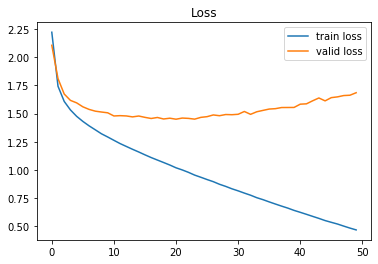

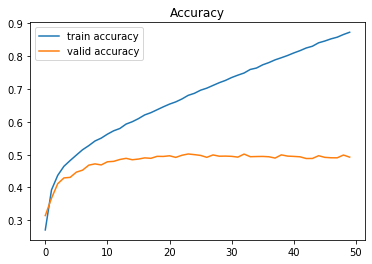

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work

1.試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

2.請嘗試將 BN 放在 Activation 之前，並比較訓練結果

3.請於 BN 放在 Input Layer 後，並比較結果

Using TensorFlow backend.
W0724 00:57:18.222388 4478641600 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 00:57:18.233988 4478641600 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 00:57:18.236319 4478641600 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 00:57:18.328155 4478641600 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_bac

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 193s 4ms/step - loss: 2.2638 - acc: 0.1437 - val_loss: 2.6392 - val_acc: 0.1392
Epoch 50/50
50000/50000 [==============================] - 188s 4ms/step - loss: 2.2650 - acc: 0.1470 - val_loss: 2.6128 - val_acc: 0.1792


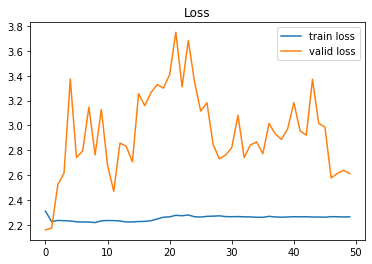

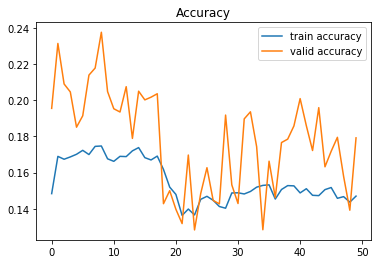

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 26s 511us/step - loss: 1.1106 - acc: 0.6058 - val_loss: 1.3779 - val_acc: 0.5188
Epoch 50/50
50000/50000 [==============================] - 32s 647us/step - loss: 1.1054 - acc: 0.6087 - val_loss: 1.3972 - val_acc: 0.5138


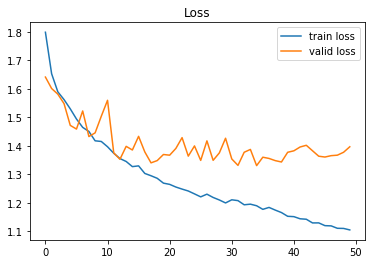

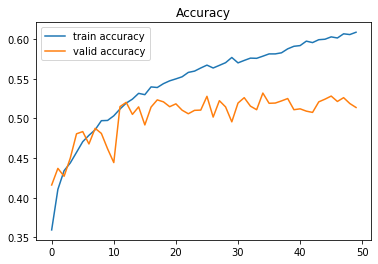

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 21s 420us/step - loss: 0.8082 - acc: 0.7109 - val_loss: 1.5565 - val_acc: 0.5111
Epoch 50/50
50000/50000 [==============================] - 21s 420us/step - loss: 0.7980 - acc: 0.7159 - val_loss: 1.6500 - val_acc: 0.4867


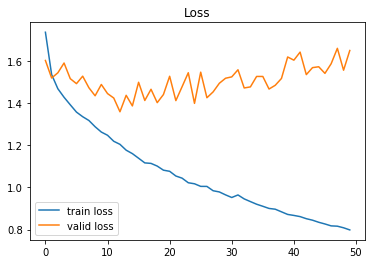

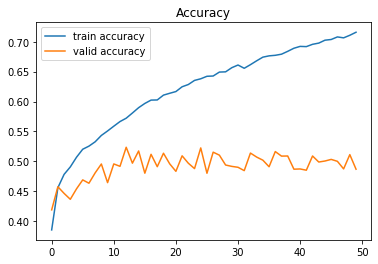

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 9s 176us/step - loss: 0.2878 - acc: 0.9007 - val_loss: 2.4955 - val_acc: 0.4674
Epoch 50/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.2778 - acc: 0.9045 - val_loss: 2.4634 - val_acc: 0.4783


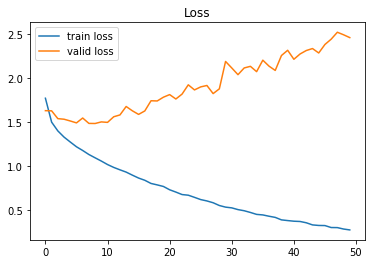

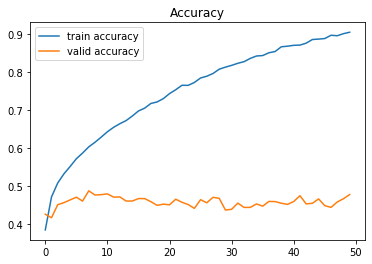

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 6s 116us/step - loss: 0.1765 - acc: 0.9515 - val_loss: 2.4469 - val_acc: 0.4618
Epoch 50/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.1638 - acc: 0.9581 - val_loss: 2.4806 - val_acc: 0.4722


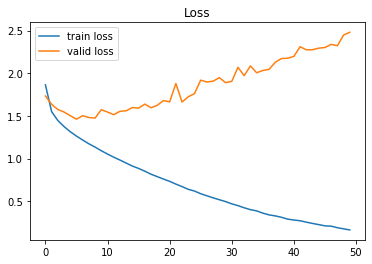

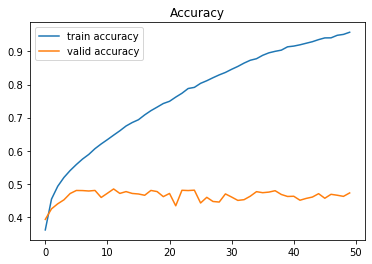

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""




train, test = keras.datasets.cifar10.load_data()






## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    






x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)






from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model






## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95






# Define results
results = {}
for batchSize in BATCH_SIZE :
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              
              # different batch_size
              batch_size=batchSize, 
              
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    name_tag = 'batchSize : %.2f' % batchSize
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

    
    
    
    
    # plot
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()


## 觀察現象 : BATCH_SIZE = [2, 16, 32, 128, 256]

when batch_size == 2, low train acc(0.1264), low validation acc(0.1390), there's no overfitting

when batch_size == 16, a better train acc(0.6089), better validation acc(0.5367), overfitting exists

when batch_size == 32, 128, 256, high train acc(0.9, 0.95), poor validation acc(0.45), overfitting 

## 2.請嘗試將 BN 放在 Activation 之前，並比較訓練結果

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_24 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

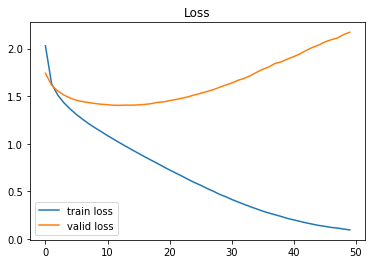

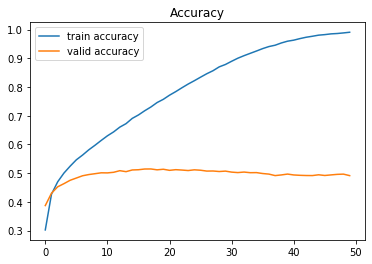

In [15]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""




train, test = keras.datasets.cifar10.load_data()






## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    






x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)






from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            # 2. 把 BatchNormalization 放在 activation 前
            x = BatchNormalization()(input_layer)
            
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            # 2. 把 BatchNormalization 放在 activation 前
            x = BatchNormalization()(x)
            
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model






## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 512
MOMENTUM = 0.95





model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]




# # Define results
# results = {}
# for batchSize in BATCH_SIZE :
    
#     model = build_mlp(input_shape=x_train.shape[1:])
#     model.summary()

#     optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
#     model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

#     model.fit(x_train, y_train, 
#               epochs=EPOCHS, 
              
#               # different batch_size
#               batch_size=batchSize, 
              
#               validation_data=(x_test, y_test), 
#               shuffle=True)

#     # Collect results
#     train_loss = model.history.history["loss"]
#     valid_loss = model.history.history["val_loss"]
#     train_acc = model.history.history["acc"]
#     valid_acc = model.history.history["val_acc"]
    
#     name_tag = 'batchSize : %.2f' % batchSize
#     results[name_tag] = {'train-loss': train_loss,
#                          'valid-loss': valid_loss,
#                          'train-acc' : train_acc,
#                          'valid-acc' : valid_acc}

    
    
    
    
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 3.請於 BN 放在 Input Layer 後，並比較結果

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
______________________________________________________________

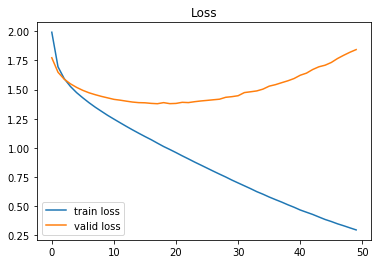

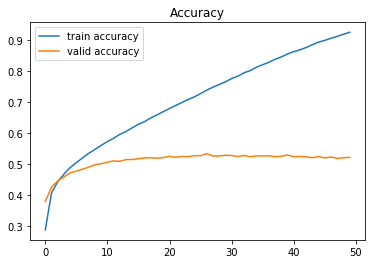

In [16]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""




train, test = keras.datasets.cifar10.load_data()






## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    






x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)






from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    # 3. BN 放在 Input Layer 後
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model






## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 512
MOMENTUM = 0.95





model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]




# # Define results
# results = {}
# for batchSize in BATCH_SIZE :
    
#     model = build_mlp(input_shape=x_train.shape[1:])
#     model.summary()

#     optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
#     model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

#     model.fit(x_train, y_train, 
#               epochs=EPOCHS, 
              
#               # different batch_size
#               batch_size=batchSize, 
              
#               validation_data=(x_test, y_test), 
#               shuffle=True)

#     # Collect results
#     train_loss = model.history.history["loss"]
#     valid_loss = model.history.history["val_loss"]
#     train_acc = model.history.history["acc"]
#     valid_acc = model.history.history["val_acc"]
    
#     name_tag = 'batchSize : %.2f' % batchSize
#     results[name_tag] = {'train-loss': train_loss,
#                          'valid-loss': valid_loss,
#                          'train-acc' : train_acc,
#                          'valid-acc' : valid_acc}

    
    
    
    
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 參考資料


## 知乎 - BatchNorm 的原理與實戰


### 背景：

<font color="orange">為什麼神經網路這麼不穩定 → 神經網路各層間的映射頻繁的變換 (Internal Covariate Shift)</font>

- ### Internal Covariate Shift 的問題

     - 網路在初期需要透過不斷大幅調整來適應輸入的分布變化

     - 深層網路的梯度消失/爆炸問題使分布更加不穩

- ### 解法
         在各層網路中的各特徵軸 (channel) 單獨進行標準化，使其變為分布平均為 0, 變異數為 1 的分布，再加上

         平移與縮放，就可以表示原本的分布。



## 參考連結：

## [為何要使用 Batch Normalization](https://morvanzhou.github.io/tutorials/machine-learning/ML-intro/3-08-batch-normalization/)

> 
> ### <font color="blue">Batch normalization 的 batch 是批數據, 把數據分成小批小批進行 stochastic gradient descent. 而且在每批數據進行前向傳遞 forward propagation 的時候, 對每一層都進行 normalization 的處理</font>



當我們加上一層激勵函數, 激活這個 $ Wx $ 值的時候, 問題就來了. 如果使用像 tanh 的激勵函數, Wx的激活值就變成了 ~0.1 和 ~1, 接近於 1 的部已經處在了激勵函數的飽和階段, 也就是如果 x 無論再怎麼擴大, tanh 激勵函數輸出值也還是接近 1. 

換句話說, 神經網絡在初始階段已經不對那些比較大的 x 特徵範圍敏感了. 

<font color="red">「Activation function 對於極端值不敏感」這樣的特性很糟糕, 想像我輕輕拍自己的感覺和重重打自己的感覺居然沒什麼差別, 就像是我的感官系統失效了.</font>

當然我們是可以用之前提到的對數據做normalization 預處理, 使得輸入的 x 變化範圍不會太大, 讓輸入值經過激勵函數的敏感部分. 但剛剛這個不敏感問 不僅僅發生在神經網絡的輸入層, 而且在隱藏層中也經常會發生.


Batch normalization 的 batch 是批數據, 把數據分成小批小批進行stochastic gradient descent. 而且在每批數據進行前向傳遞forward propagation 的時候, 對每一層都進行normalization 的處理,

![img2](https://morvanzhou.github.io/static/results/ML-intro/NB5.png)

![img3](https://morvanzhou.github.io/static/results/ML-intro/NB6.png)


> ### <font color="red">沒有normalize 的數據使用tanh 激活以後, 激活值大部分都分佈到了飽和階段, 也就是大部分的激活值不是-1, 就是1, 而normalize 以後, 大部分的激活值在每個分佈區間都還有存在. 再將這個激活後的分佈傳遞到下一層神經網絡進行後續計算, 每個區間都有分佈的這一種對於神經網絡就會更加有價值</font> Batch normalization 不僅僅normalize 了一下數據, 他還進行了反normalize 的手續. 為什麼要這樣呢?

> <font color="red">公式的後面還有一個反向操作, 將normalize 後的數據再擴展和平移. 原來這是為了讓神經網絡自己去學著使用和修改這個擴展參數gamma, 和平移參數β, 這樣神經網絡就能自己慢慢琢磨出前面的normalization 操作到底有沒有起到優化的作用, 如果沒有起到作用, 我就使用gamma 和belt 來抵消一些normalization 的操作.</font>
> ![img4](https://morvanzhou.github.io/static/results/ML-intro/NB7.png)


<font color="red">Batch Normalization 的成果 : normalize 以後, 大部分的激活值在每個分佈區間都還有存在. 再將這個激活後的分佈傳遞到下一層神經網絡進行後續計算, 每個區間都有分佈的這一種對於神經網絡就會更加有價值</font>

![img5](https://morvanzhou.github.io/static/results/ML-intro/NB8.png)

--

## [Batch normalization 原理與實戰](https://zhuanlan.zhihu.com/p/34879333)


## 1.2 什麼是 <font color="red">Internal Covariate Shift</font>

Batch Normalization的原論文作者給了 Internal Covariate Shift 一個較規範的定義：<font color="red">在深層網絡訓練的過程中，由於網絡中參數變化而引起內部結點數據分佈發生變化的這一過程被稱作 Internal Covariate Shift。</font>

> <font color="red">我們規定左側為神經網絡的底層，右側為神經網絡的上層。那麼網絡中層與層之間的關聯性會導致如下的狀況：隨著訓練的進行，網絡中的參數也隨著梯度下降在不停更新。一方面，當底層網絡中參數發生微弱變化時，由於每一層中的線性變換與非線性激活映射，這些微弱變化隨著網絡層數的加深而被放大（類似蝴蝶效應）；另一方面，參數的變化導致每一層的輸入分佈會發生改變，進而上層的網絡需要不停地去適應這些分佈變化，使得我們的模型訓練變得困難。上述這一現象叫做Internal Covariate Shift。</font>

## 1.3 Internal Covariate Shift會帶來什麼問題？

（1）上層網絡需要不停調整來適應輸入數據分佈的變化，導致網絡學習速度的降低


（2）網絡的訓練過程容易陷入梯度飽和區，減緩網絡收斂速度


## 1.4 我們如何減緩Internal Covariate Shift？

要緩解ICS的問題，就要明白它產生的原因。<font color="red">ICS產生的原因是由於參數更新帶來的網絡中每一層輸入值分佈的改變，並且隨著網絡層數的加深而變得更加嚴重，因此我們可以通過固定每一層網絡輸入值的分佈來對減緩ICS問題。</font>

### （1）<font color="#4bc54d">白化（Whitening）</font>

白化（Whitening）是機器學習裡面常用的一種規範化數據分佈的方法，主要是PCA白化與ZCA白化。白化是對輸入數據分佈進行變換，進而達到以下兩個目的：

    使得輸入特徵分佈具有相同的均值與方差。其中PCA白化保證了所有特徵分佈均值為0，方差為1；而ZCA白化則保證了所有特徵分佈均值為0，方差相同；
    去除特徵之間的相關性。
    通過白化操作，我們可以減緩ICS的問題，進而固定了每一層網絡輸入分佈，加速網絡訓練過程的收斂（LeCun et al.,1998b；Wiesler&Ney,2011）。


### （2）<font color="#4bc54d">Batch Normalization提出</font>

既然白化可以解決這個問題，為什麼我們還要提出別的解決辦法？當然是現有的方法具有一定的缺陷，白化主要有以下兩個問題：

    白化過程計算成本太高，並且在每一輪訓練中的每一層我們都需要做如此高成本計算的白化操作；
    白化過程由於改變了網絡每一層的分佈，因而改變了網絡層中本身數據的表達能力。底層網絡學習到的參數信息會被白化操作丟失掉。
    既然有了上面兩個問題，那我們的解決思路就很簡單，一方面，我們提出的normalization方法要能夠簡化計算過程；另一方面又需要經過規範化處理後讓數據盡可能保留原始的表達能力。於是就有了簡化+改進版的白化——Batch Normalization。

--

如同上面提到的，Normalization操作我們雖然緩解了ICS問題，讓每一層網絡的輸入數據分佈都變得穩定，但卻導致了數據表達能力的缺失。也就是我們通過變換操作改變了原有數據的信息表達（representation ability of the network），使得底層網絡學習到的參數信息丟失。另一方面，通過讓每一層的輸入分佈均值為0，方差為1，會使得輸入在經過sigmoid或tanh激活函數時，容易陷入非線性激活函數的線性區域。

<font color="red">因此，BN又引入了兩個可學習（learnable）的參數 $ \gamma $ 與 $ \beta $ 。這兩個參數的引入是為了恢復數據本身的表達能力，對規範化後的數據進行線性變換，即![img11](https://www.zhihu.com/equation?tex=%5Ctilde%7BZ_j%7D%3D%5Cgamma_j+%5Chat%7BZ%7D_j%2B%5Cbeta_j)
特別地，當 $ \gamma^2 = \sigma^2, \beta = \mu $ 時，可以實現等價變換（identity transform）並且保留了原始輸入特徵的分佈信息。</font>

通過上面的步驟，我們就在一定程度上保證了輸入數據的表達能力。

